<h1 style="color:blue;">Totorial 2 Coding Task: Logistic Regression on the Breast Cancer Dataset (Solution)</h1>

In this tutorial, we load the breast cancer data from `sklearn.datasets` and do classification using logistic regression with and without normalization to compute the average performance over 10 experiments. Further, we also do ridge and lasso regularizations to see if we can improve the performance. 

<h1 style="color:red;">Intructions</h1>

- Progress cell-by-cell.
- Check for **<a style="color:red;">Execute</a>s**, where codes for <a style="color:green;">green</a> tasks are already written and you are expected write codes to excute the remaining tasks.
- Check the exercises 2.1, 2.2, and 2.3 on Week 2 Ed lesson for help to complete the tasks.
- After completing all the tasks, write your observations at the end.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:blue;">1) Load the dataset</h2>

Data description
    
The `load_breast_cancer` dataset in scikit-learn is a classic binary‐classification benchmark. It contains 569 tumor samples described by 30 real-valued features—computed from digitized images of fine needle aspirate (FNA) of breast masses—such as radius, texture, perimeter, area, and smoothness (each measured as mean, standard error, and “worst”/largest value). The task is to predict whether a tumor is malignant (212 samples) or benign (357 samples). Data shape:   

- X: array of shape (569, 30)  
- y: array of shape (569,), values in {0 = malignant, 1 = benign}

<h3 style="color:red;">Execute:</h3>

- <a style="color:green;">Load the dataset to create X and y</a>
- Print the shapes of X and y
- Print the first 5 samples 

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Print shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Print the first 5 sample
print("\nFirst 5 samples of X:\n", X[:5])
print("First 5 labels y:\n", y[:5])

Feature matrix shape: (569, 30)
Target vector shape: (569,)

First 5 samples of X:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.61

<h2 style="color:blue;">2) Exploratory Data Analysis</h2>
<h3 style="color:red;">Execute</h3>

- Compute the correlation between the columns in the data (features + target) 
- Print that correlation using `seaborn`

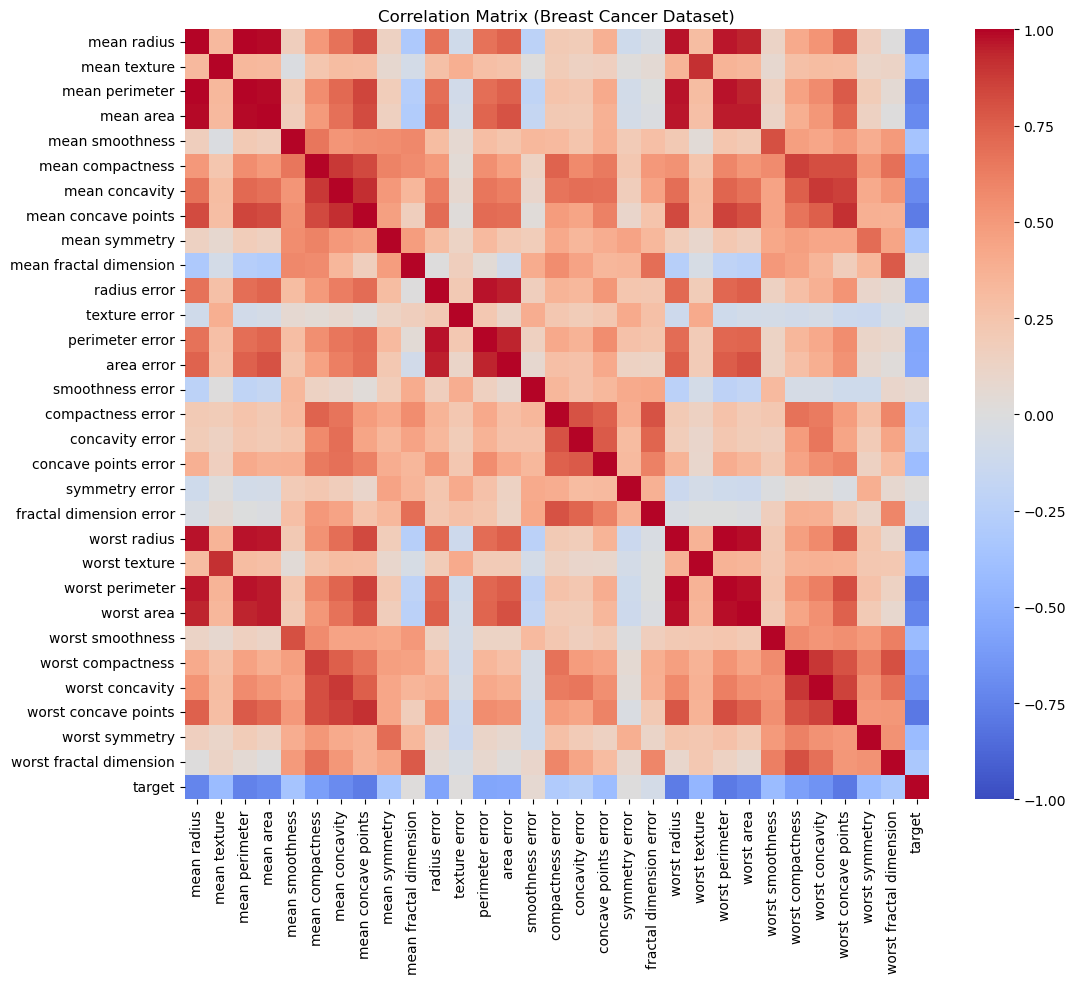

In [3]:
# load into DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# compute correlation matrix (including target)
corr = df.corr()

# optional: plot a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix (Breast Cancer Dataset)')
plt.show()

In [4]:
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<h3 style="color:red;">Execute</h3>

- <a style="color:green;">Plot an histogram of sample counts per class</a>
- <a style="color:green;">Pick a feature and plot its distribution per class</a>
- change the following code to pick a different feature of your choice to plot its distribution per class

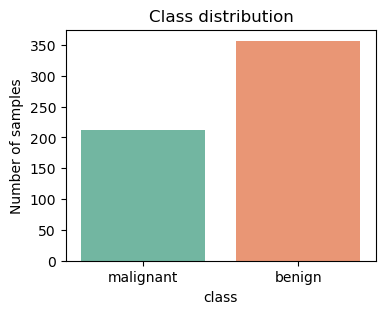

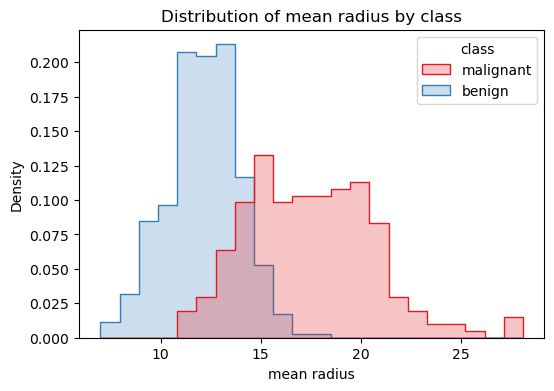

In [5]:
# identify the classes
df['class']  = df['target'].map({0:'malignant', 1:'benign'})

# Histogram of sample counts per class
plt.figure(figsize=(4,3))
sns.countplot(x='class', data=df, hue='class', palette='Set2', legend=False)
plt.title("Class distribution")
plt.ylabel("Number of samples")
plt.show()

# pick a feature, e.g. 'mean radius'
feat = 'mean radius'
plt.figure(figsize=(6,4))
sns.histplot(df, x=feat, hue='class',
             element='step', stat='density',
             common_norm=False, palette='Set1')
plt.title(f"Distribution of {feat} by class")
plt.show()

<h2 style="color:blue;">3) Split the Data into 80/20 and Fit with 5-Fold Cross-Validation</h2>

<h3 style="color:red;">Execute</h3>

- <a style="color:green;">Split the dataset into 80% training and 20% testing data using `train_test_split`</a>
- <a style="color:green;">Fit a softmax regression model using 5-fold cross-validation</a>
- Fit the model `clf` using `clf.fit` on the training data
- Evaluate the model on the test data, that is, compute `y_pred`
- Print test accuracy and confusion matrix

**Note:** *We compute `cv_scores` before fitting the model because `cross_val_score` does its own fitting-and-scoring inside each fold, you actually pass it an unfitted estimator and let it call fit on every train-split behind the scenes. The final `.fit()` is only to produce your production model.*

In [6]:
# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train softmax regression model with 5-fold cross-validation
clf = LogisticRegression(solver='saga', penalty=None, tol=1e-3, max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Fit the model on the training data
clf.fit(X_train, y_train)

# Evaluate on the test data
y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.95604396 0.87912088 0.96703297 0.86813187 0.89010989]
Mean CV accuracy: 0.9120879120879121
Test accuracy: 0.956140350877193

Confusion Matrix:
 [[38  5]
 [ 0 71]]


<h2 style="color:blue;">3) Compute average test performance without normalization</h2>

We conduct 10 experiments without normalization and with different random seeds to compute the average performance on test data.

In [7]:
# Conduct 10 experiments with different random seeds
test_accuracies = []

for seed in range(10):
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Train and evaluate the model
    clf = LogisticRegression(solver='saga', penalty=None, tol=1e-3, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

print("Test accuracies without normalization:", test_accuracies)
print("\nMean test accuracy without normalization:", np.mean(test_accuracies))

Test accuracies without normalization: [0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.8771929824561403, 0.9210526315789473, 0.9385964912280702, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088]

Mean test accuracy without normalization: 0.9175438596491228


<h2 style="color:blue;">4) Normalize the data to check if we get performance improvement</h2>

<h3 style="color:red;">Execute</h3>

- Conduct 10 experiments with different random seeds. Normalize the dataset in each experiment using 
```python
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

**Note:** Under the hood, this is what happens:
When you call  
```python
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```
two things happen for each feature column $j$ of $X$:

1. *Fit*  
   Computes the sample mean  
     $$\mu_j = \frac{1}{n_{\rm train}}\sum_{i=1}^{n_{\rm train}}X_{i,j}$$
   Computes the sample standard deviation  
     $$\sigma_j = \sqrt{\frac{1}{n_{\rm train}}\sum_{i=1}^{n_{\rm train}}(X_{i,j}-\mu_j)^2}$$

2. *Transform* 
   Replaces each training value by  
     
     $$X'_{i,j} \;=\;\frac{X_{i,j}-\mu_j}{\sigma_j},$$
     so that the transformed column has zero mean and unit variance over the training set.

When you later do  
```python
X_test = scaler.transform(X_test)
```
it uses the same $\mu_j$ and $\sigma_j$ learned from the training data to standardize the test features:
$$
X'_{\rm test, i,j}
=\frac{X_{{\rm test},i,j}-\mu_j}{\sigma_j}.
$$
This ensures your model sees test‐set features on the *exact* scale it was trained on.

In [8]:
# Conduct 10 experiments with different random seeds
test_accuracies = []

for seed in range(10):
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train and evaluate the model
    clf = LogisticRegression(solver='saga', penalty=None, tol=1e-3, max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

print("Test accuracies with normalization:", test_accuracies)
print("\nMean test accuracy with normalization:", np.mean(test_accuracies))

Test accuracies with normalization: [0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9912280701754386]

Mean test accuracy with normalization: 0.9701754385964912


<h2 style="color:blue;">5) Ridge and Lasso Regularization to Improve Performance</h2>

We now apply ridge and lasso regularization to the softmax regression model in addition to normalization. Again, conduct 10 ex[eriments and compute the average accuracy.

<h3 style="color:red;">Execute</h3>

- For the ridge regularization, change the penaty to l2 using `penalty = 'l2'`
- For the lasso rregularization, change the penaty to l2 using `penalty = 'l1'`

In [9]:
test_ridge_accuracies = []
test_lasso_accuracies = []

for seed in range(10):
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Ridge regularization
    clf_ridge = LogisticRegression(solver='saga', tol=1e-3, max_iter=1000, penalty='l2')
    clf_ridge.fit(X_train, y_train)
    y_pred_ridge = clf_ridge.predict(X_test)
    test_ridge_accuracies.append(accuracy_score(y_test, y_pred_ridge))
    
    # Lasso regularization
    clf_lasso = LogisticRegression(solver='saga', tol=1e-3, max_iter=1000, penalty='l1')
    clf_lasso.fit(X_train, y_train)
    y_pred_lasso = clf_lasso.predict(X_test)
    test_lasso_accuracies.append(accuracy_score(y_test, y_pred_lasso))

print("Mean test accuracy with ridge penalty and normalization:", np.mean(test_ridge_accuracies))
print("Mean test accuracy with lasso penalty and normalization:", np.mean(test_lasso_accuracies))

Mean test accuracy with ridge penalty and normalization: 0.9754385964912279
Mean test accuracy with lasso penalty and normalization: 0.9710526315789474


<h2 style="color:blue;">6) Write at least four of your observations here</h2>

- Obs 1:
- Obs 2:
- Obs 3:
- Obs 4: